# Calculate Stark map for triplet helium

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from starkhelium import *
from tqdm import trange, tqdm

au_to_ghz = 10**-9 * E_h /h
au_to_cm = E_h / (100 * h * c)

In [2]:
# quantum numbers
nmin = 38
nmax = 43
S = 1
m = 0
n_vals, L_vals = get_nl_vals(nmin, nmax, m)
J_vals = get_J_vals(S, L_vals, 1)
# quantum defects
neff = n_vals #- get_qd(S, n_vals, L_vals, J_vals)
# energy levels
#En = W_n(S, n_vals, L_vals, J_vals)
En = En_0(neff)
# field-free Hamiltonian
H_0 = np.diag(En)
# Diamagnetic interaction
mat_D = diamagnetic_matrix_select_m(neff, L_vals, m)

calculate Diamagnetic terms: 100%|██████████| 243/243 [00:01<00:00, 121.84it/s]


In [3]:
# Turn off Stark interaction
mat_S = np.zeros_like(H_0)
# electric field
field_au = [0]
# Magnetic field
B_z_arr = np.linspace(0.0, 2.5, 101)
# M values
m_vals = np.ones_like(n_vals)*m
# Eigenvalues array
eig_vals = []

for B_z in B_z_arr:
    # (in atomic units)
    B_z_au = B_z / (hbar/(e*a_0**2))
    # Zeeman interaction Hamiltonian
    H_Z = np.diag(E_zeeman(m_vals, B_z_au))
    # Diamagnetic interaction Hamiltonian
    H_D = mat_D * (B_z_au**2)/8
    # diagonalise for each field
    eig_vals.append( stark_map(H_0, mat_S, field_au, H_Z=H_Z, H_D=H_D, disableTQDM=True)[0] )

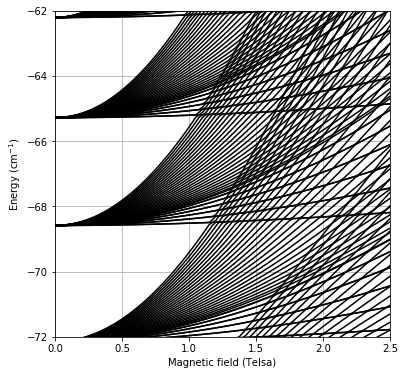

In [4]:
plt.figure(figsize=(6,6))
for i in range( np.shape(eig_vals)[1] ):
    plt.plot(B_z_arr, np.array(eig_vals)[:,i]*au_to_cm, 'k')
    
plt.xlabel('Magnetic field (Telsa)')
plt.ylabel('Energy (cm$^{-1}$)')
plt.xlim([np.min(B_z_arr), np.max(B_z_arr)])
plt.ylim([-72, -62])
plt.grid()